In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go

import matplotlib
import plotly
import sklearn

from IPython.display import display

# TAB自动补全
%config Completer.use_jedi = False

print("package版本信息：")
print("numpy:      ", np.__version__)
print("pandas:     ", pd.__version__)
print("matplotlib: ", matplotlib.__version__)
print("sklearn:    ", sklearn.__version__)
print("seaborn:    ", sns.__version__)
print("plotly:     ", plotly.__version__)

package版本信息：
numpy:       1.19.2
pandas:      1.2.2
matplotlib:  3.3.4
sklearn:     0.23.2
seaborn:     0.11.1
plotly:      4.14.3


# Sklearn中的决策树

In [3]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz,plot_tree
from sklearn.datasets import load_wine

In [4]:
wine = load_wine()

In [5]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
wine.data.shape

(178, 13)

In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
wine.target.shape

(178,)

In [9]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

训练一棵树

In [10]:
clf = DecisionTreeClassifier()
clf.fit(wine.data,wine.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
clf.score(wine.data,wine.target)

1.0

绘制决策树
有两种绘制方式：
1. 使用`sklearn.tree`里自带的`plot_tree`函数
2. 使用`graphviz`模块绘制

In [12]:
import graphviz

In [13]:
tree_dot = export_graphviz(clf)

In [17]:
graph = graphviz.Source(tree_dot)

In [18]:
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

[Text(189.42631578947368, 199.32, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(114.53684210526316, 163.07999999999998, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(70.48421052631579, 126.83999999999999, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(35.242105263157896, 90.6, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(17.621052631578948, 54.359999999999985, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(52.863157894736844, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(105.72631578947369, 90.6, 'X[1] <= 2.395\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(88.10526315789474, 54.359999999999985, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(123.34736842105264, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(158.58947368421053, 126.83999999999999, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 6

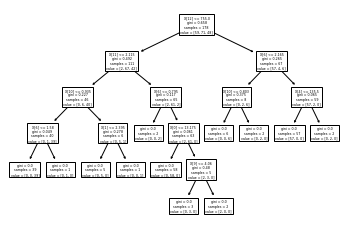

In [16]:
plot_tree(clf)

探索决策树

In [ ]:
clf.feature_importances_

-----

# 孤立森林

`sklearn.ensemble.IsolationForest`，用于异常值检测.

`IsolationForest(*, n_estimators=100, max_samples='auto', contamination='auto', max_features=1.0, bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)`

+ 实例化参数
  + `n_estimators`，用于计算的树的个数
  + `max_samples`，每棵树中，用于构建的最大样本数，有如下取值：
    + int, 指定使用的最大样本数
    + float, 指定使用的比例
    + `"auto"`, 那么取值为 $min(256, n\_samples)$
  
  其他的不重要.


+ 属性
  + `base_estimator_`, 
  + `estimators_`, 拟合的所有的树的列表
  + `max_samples_`, 使用的最大样本数
  + `n_features_`, 


+ 方法
  + `decision_function(X)`, 计算每个样本在所有base estimator中的 anomaly score 的均值.  
  返回值是一个 `shape=(n_samples,)` 的ndarray.
  + `fit_predict(X)`, `predict(X)`, 判断样本是否为异常点.  
  返回值为 `shape=(n_samples,)`，1 表示正常， -1 表示异常值.
  + `score_samples(X)`, 计算每个样本的 anomaly score 的负值？？？？？   
  返回值为 ndarray of `shape=(n_samples,)`.
  

下面的例子来源于sklearn官方文档 [IsolationForest Sample](https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py).

In [2]:
from sklearn.ensemble import IsolationForest

In [3]:
rng = np.random.RandomState(42)

X = 0.5*rng.randn(100, 2)

# 产生两个中心点，一个往左下方移动 2, 一个往右上方移动 2
X = pd.DataFrame(np.vstack([X-2, X+2]), columns=['x', 'y'])

# 产生一些异常点，从 [-4, 4]的区间的均匀分布产生
X_outliers = pd.DataFrame(rng.uniform(low=-4, high=4, size=(20, 2)),  columns=['x', 'y'])

In [18]:
ifrest = IsolationForest(n_estimators=20, max_samples=100)

X_all = pd.concat([X, X_outliers], axis=0)
ifrest.fit(X_all)
y_pred = ifrest.predict(X_all)

In [19]:
ifrest.estimators_samples_[0]

array([ 21,  28, 188, 204,  11, 160,  72,  76, 106, 150, 185,  93,  56,
        31, 141, 156,  14, 147, 171,  96, 127,  77, 173,  51,  10, 201,
         9, 219,  69, 199,  78,  13, 153, 133, 176,  55, 132,  41,  91,
       118, 208,  33, 158, 100, 125, 108,  32, 197, 192,  20, 113, 103,
        37,  94,  67, 144,  17, 124, 206, 128, 216,  61,  70, 196,  47,
        60,  87, 194, 203,  49,  63,  83,  34, 187, 149,  22, 121,  36,
       212, 122, 175, 168, 112,  97,  19,   4, 105, 174, 110,  89, 191,
       207, 190,  73,  27, 186, 178, 193,  90,   3])

In [20]:
y_pred[:10]

array([ 1,  1,  1,  1,  1,  1, -1, -1,  1, -1])

In [21]:
outliers_pred = X_all[y_pred == -1]

In [23]:
outliers_pred.shape

(60, 2)

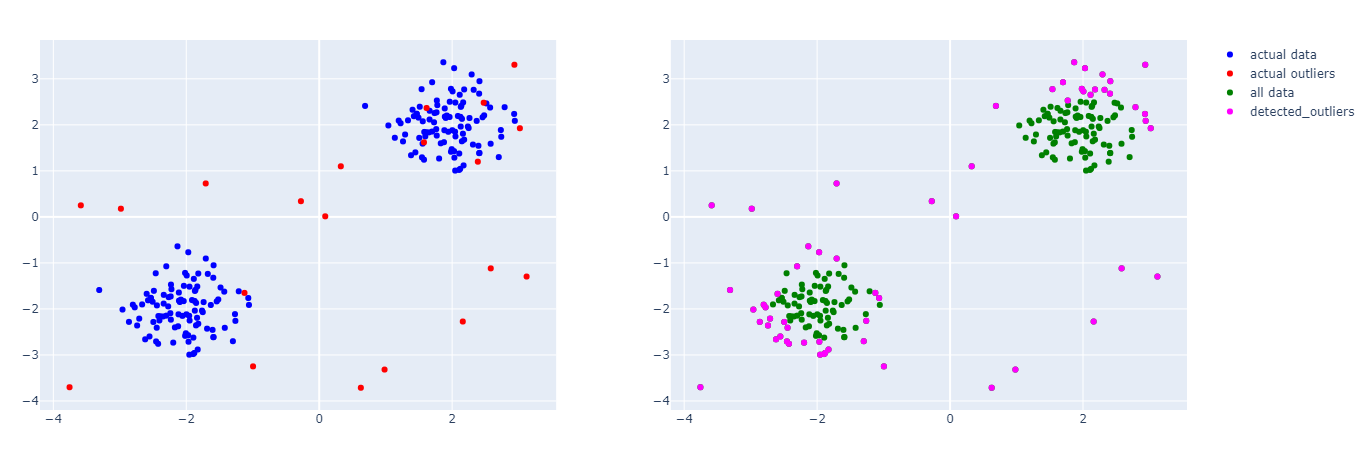

In [42]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, row_heights=[400], column_widths=[500, 500])

subfig = px.scatter(X, x='x', y='y', color_discrete_sequence=['blue'])
subfig.data[0].name="actual data"
subfig.data[0].showlegend=True
fig.add_trace(subfig.data[0], row=1, col=1)
# subfig.data[0].showlegend=False
# fig.add_trace(subfig.data[0], row=1, col=2)

fig.add_trace(
    go.Scatter(x=X_outliers['x'], y=X_outliers['y'], mode='markers',
               marker=dict(color='red')
               , name="actual outliers"
              ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=X_all['x'], y=X_all['y'], mode='markers',
               marker=dict(color='green'),
               name="all data"
              ),
    row=1, col=2
)


fig.add_trace(
    go.Scatter(x=outliers_pred['x'], y=outliers_pred['y'], mode='markers',
              marker=dict(color='magenta'),
               name="detected_outliers"
              ),
    row=1, col=2
)

fig.update_layout(margin=dict(l=40, r=40, t=40, b=40))

fig.show()